# Multidimensional Knapsack

### Problem definition

Given a set of $n$ items and $m$ types of resources (also called *knapsacks*), the problem is to find a subset of items that maximizes profit without consuming more resources than it is available. More precisely, the problem is:

$$
\begin{align*}
    \text{maximize}
        & \sum_{j=1}^n p_j x_j
        \\
    \text{subject to}
        & \sum_{j=1}^n w_{ij} x_j \leq b_i
        & \forall i=1,\ldots,m \\
    & x_j \in \{0,1\}
        & \forall j=1,\ldots,n
\end{align*}
$$

### Random instance generator

The class `MultiKnapsackGenerator` can be used to generate random instances of this problem. The number of items $n$ and knapsacks $m$ are sampled from the user-provided probability distributions `n` and `m`. The weights $w_{ij}$ are sampled independently from the provided distribution `w`. The capacity of knapsack $i$ is set to

$$
    b_i = \alpha_i \sum_{j=1}^n w_{ij}
$$

where $\alpha_i$, the tightness ratio, is sampled from the provided probability
distribution `alpha`. To make the instances more challenging, the costs of the items
are linearly correlated to their average weights. More specifically, the price of each
item $j$ is set to:

$$
    p_j = \sum_{i=1}^m \frac{w_{ij}}{m} + K  u_j,
$$

where $K$, the correlation coefficient, and $u_j$, the correlation multiplier, are sampled
from the provided probability distributions `K` and `u`.

If `fix_w=True` is provided, then $w_{ij}$ are kept the same in all generated instances. This also implies that $n$ and $m$ are kept fixed. Although the prices and capacities are derived from $w_{ij}$, as long as `u` and `K` are not constants, the generated instances will still not be completely identical.


If a probability distribution `w_jitter` is provided, then item weights will be set to $w_{ij} \gamma_{ij}$ where $\gamma_{ij}$ is sampled from `w_jitter`. When combined with `fix_w=True`, this argument may be used to generate instances where the weight of each item is roughly the same, but not exactly identical, across all instances. The prices of the items and the capacities of the knapsacks will be calculated as above, but using these perturbed weights instead.

By default, all generated prices, weights and capacities are rounded to the nearest integer number. If `round=False` is provided, this rounding will be disabled.


<div class="alert alert-info">
References

* **Freville, Arnaud, and Gérard Plateau.** *An efficient preprocessing procedure for the multidimensional 0–1 knapsack problem.* Discrete applied mathematics 49.1-3 (1994): 189-212.
* **Fréville, Arnaud.** *The multidimensional 0–1 knapsack problem: An overview.* European Journal of Operational Research 155.1 (2004): 1-21.
</div>
    
### Challenge A

* 100 variables, 10 constraints, fixed weights
* $w \sim U(0, 1000), \gamma \sim U(0.95, 1.05)$
* $K = 500, u \sim U(0, 1), \alpha = 0.25$
* 512 training instances, 64 test instances


CPU times: user 26 s, sys: 1min 6s, total: 1min 32s
Wall time: 16min 21s


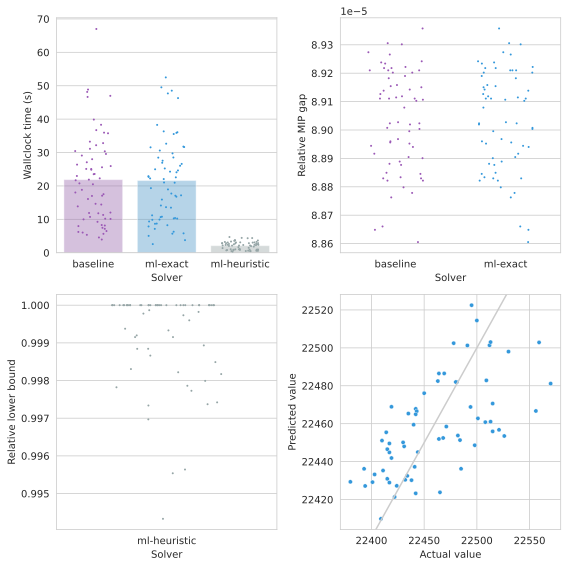

In [1]:
%%time
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

from miplearn.benchmark import run_benchmarks
from miplearn.problems.knapsack import MultiKnapsackGenerator
from scipy.stats import uniform, randint

instances = MultiKnapsackGenerator(
    n=randint(low=100, high=101),
    m=randint(low=10, high=11),
    w=uniform(loc=0.0, scale=1000.0),
    K=uniform(loc=500.0, scale=0.0),
    u=uniform(loc=0.0, scale=1.0),
    alpha=uniform(loc=0.25, scale=0.0),
    fix_w=True,
    w_jitter=uniform(loc=0.95, scale=0.1),
).generate(576)

run_benchmarks(
    train_instances = instances[:512],
    test_instances = instances[512:],
    n_jobs=16,
);